AI Task 1

Name - Shahid Mulani

mail - shahidkmulani@gmail.com

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset (Make sure you have uploaded the file to Colab)
df = pd.read_csv('Dataset (1).csv')

# Check basic info and target balance
print("Dataset Shape:", df.shape)
print("\nTarget Distribution (0 = No Failure, 1 = Failure):")
print(df['Target'].value_counts())
df.head(10)

Dataset Shape: (10000, 10)

Target Distribution (0 = No Failure, 1 = Failure):
Target
0    9661
1     339
Name: count, dtype: int64


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


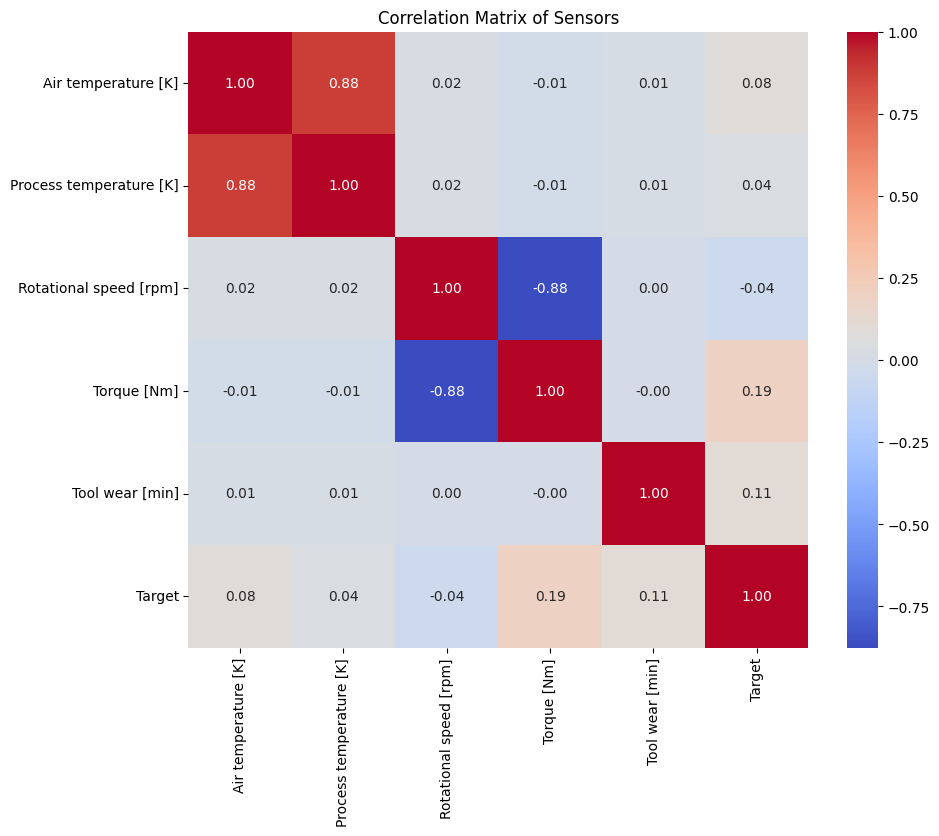

In [4]:
# Select only numerical features for correlation analysis
numeric_features = ['Air temperature [K]', 'Process temperature [K]',
                    'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Sensors")
plt.show()

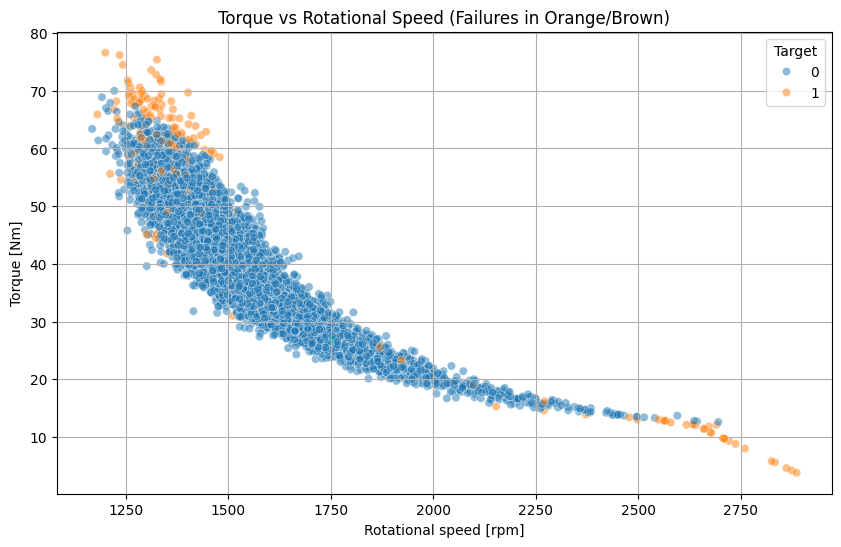

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Target', alpha=0.5)
plt.title("Torque vs Rotational Speed (Failures in Orange/Brown)")
plt.grid(True)
plt.show()

In [7]:
# 1. Feature Selection: Drop IDs and Leakage column
# We drop 'Failure Type' because it's a direct description of the outcome.
X = df.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
y = df['Target']

# 2. Categorical Encoding: Convert 'Type' (L, M, H) to numbers
le = LabelEncoder()
X['Type'] = le.fit_transform(X['Type'])

print("Features selected and 'Type' column encoded.")
X.head(7)

Features selected and 'Type' column encoded.


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
5,2,298.1,308.6,1425,41.9,11
6,1,298.1,308.6,1558,42.4,14


In [8]:
# 1. Split into 80% Training and 20% Testing
# 'stratify=y' ensures the small number of failures are distributed evenly in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 8000
Testing set size: 2000


In [9]:
# Initialize the model
# We use a forest of 100 trees
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

print("Model Training Complete.")

Model Training Complete.


Accuracy Score: 0.982

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.90      0.53      0.67        68

    accuracy                           0.98      2000
   macro avg       0.94      0.76      0.83      2000
weighted avg       0.98      0.98      0.98      2000



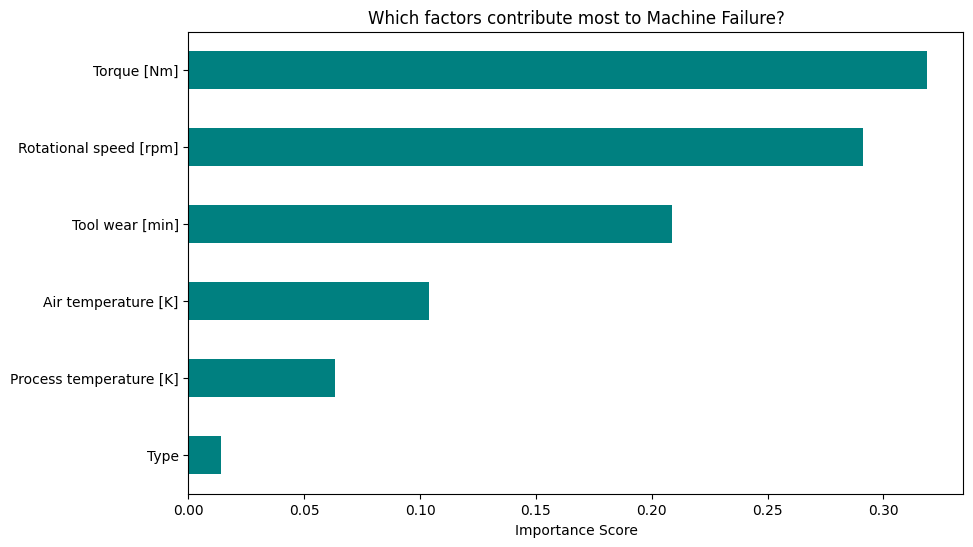

In [10]:
# 1. Predictions
y_pred = model.predict(X_test_scaled)

# 2. Metrics
print("Accuracy Score:", round(accuracy_score(y_test, y_pred), 4))
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 3. Logical Explanation: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Which factors contribute most to Machine Failure?")
plt.xlabel("Importance Score")
plt.show()